## 주제 : 산타랠리에 맞는 포트폴리오 수립
### 1. 국면 설정하기
+ 코스피와 CD금리 차트로 표시 
### 2. 통계 검증 방식
+ 각 연도마다 일일수익률을 기준으로 a, b, c 집단에 대한 통계 검증을 진행
### 3. 데이터 전처리
+ 시총과 재무 데이터 합치기
+ PEG 구하기
+ NCAV 구하기
### 4. 각 연도마다 종목 선정 및 포트폴리오 수립
+ 연도마다 PEG값을 작은 순으로 정렬하고 추가적인 요소를 고려하여 성장주 종목 선정(최대 20)
+ 연도마다 NACV값을 큰 순으로 정렬하고 가치주 종목 선정(최대 20)
+ 연도마다 투자할 종목의 비중을 포트폴리오 전략을 통해 배분
### 5. 국면에 따라 포트폴리오 전략 검증 및 수익률 비교
+ 최종적으로 만든 포트폴리오의 일일 수익률을 계산하기
+ 만든 포트폴리오로 통계 검증을 진행
### 6. 결과
+ 각 국면마다 어떤 것들이 유의한지와 평균 수익률을 비교

### 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as pdr

from datetime import datetime

In [2]:
import platform
if platform.system() == 'Darwin': # MAC
    plt.rc('font', family='AppleGothic')
else: # Windows
    plt.rc('font', family='Malgun Gothic')

### 1. 국면 정하기

+ kospi 1년 수익률과 cd 금리 1년 수익률을 비교

In [18]:
# 데이터프레임 불러오기
interest_df = pd.read_excel('./datasets/연시장금리.xlsx')
interest_df.columns = ['Unnamed: 0', 'date', '국고채 3년', '국고채 5년', '국고채 10년',
                       '회사채 3년', 'CD 91물', '콜금리', '기준금리']

# 마지막 두 행 제거
interest = interest_df.iloc[:-2]

# 'date'와 '국고채 3년' 열 선택
interest = interest[['date', '국고채 3년']]

# 'date' 열의 데이터 타입을 문자열로 변환
interest['date'] = interest['date'].astype(str)

# 'YYYYMM' 형식의 날짜를 'YYYYMM' 형식의 날짜 객체로 변환
interest['date'] = interest['date'].apply(lambda x: datetime.strptime(x, '%Y'))

interest = interest.set_index('date').resample('Y').last()

In [4]:
# 데이터프레임 불러오기
interest_df = pd.read_excel('./datasets/시장금리.xlsx')
interest_df.columns = ['Unnamed: 0', 'date', '국고채 3년', '국고채 5년', '국고채 10년',
                       '회사채 3년', 'CD 91물', '콜금리', '기준금리']

# 마지막 두 행 제거
interest = interest_df.iloc[:-2]

# 'date'와 '국고채 3년' 열 선택
interest = interest[['date', '국고채 3년']]

# 'date' 열의 데이터 타입을 문자열로 변환
interest['date'] = interest['date'].astype(str)

# 'YYYYMM' 형식의 날짜를 'YYYYMM' 형식의 날짜 객체로 변환
interest['date'] = interest['date'].apply(lambda x: datetime.strptime(x[:-1], '%Y%m'))

interest = interest.set_index('date')

In [5]:
interest

,국고채 3년
date,
1997-01-01,12.17
1997-02-01,12.10
1997-03-01,12.32
1997-04-01,12.40
1997-05-01,12.40
...,...
2023-07-01,3.64
2023-08-01,3.73
2023-09-01,3.84


In [6]:
us_bond = yf.download('DGS10', start='1999-01-01', end='2023-12-31')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DGS10: No data found, symbol may be delisted


In [7]:
kospi = yf.download('^KS200', start='1999-01-01', end='2023-12-31').resample('M').last()
kospi.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [8]:
kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-31,65.720001,66.300003,64.809998,65.720001,65.720001,99700
1999-02-28,58.450001,60.279999,58.450001,60.279999,60.279999,61100
1999-03-31,71.820000,72.320000,71.330002,71.839996,71.839996,102700
1999-04-30,87.720001,88.290001,85.500000,87.150002,87.150002,191300
1999-05-31,85.449997,87.199997,85.260002,85.680000,85.680000,111600
...,...,...,...,...,...,...
2023-08-31,335.380005,336.059998,333.390015,334.750000,334.750000,146200
2023-09-30,325.049988,327.500000,324.730011,326.709991,326.709991,81600
2023-10-31,310.489990,311.579987,305.140015,305.559998,305.559998,121700


In [9]:
import numpy as np

# 변수설정
revenue_first = 1234
revenue_end = 7491
n = 2022 - 2020

# CAGR 구하기
CAGR = np.power(revenue_end/revenue_first , 1/n) - 1

In [10]:
yearly_prices = kospi.groupby(kospi.index.year).agg({'Open': 'first', 'Close': 'last'})

In [11]:
yearly_prices['1y_pct'] = ((yearly_prices['Close'] - yearly_prices['Open'])/yearly_prices['Open']) * 100

In [13]:
interest.index = interest.index.year

In [15]:
kospi['pct'] = kospi['Adj Close'].pct_change()

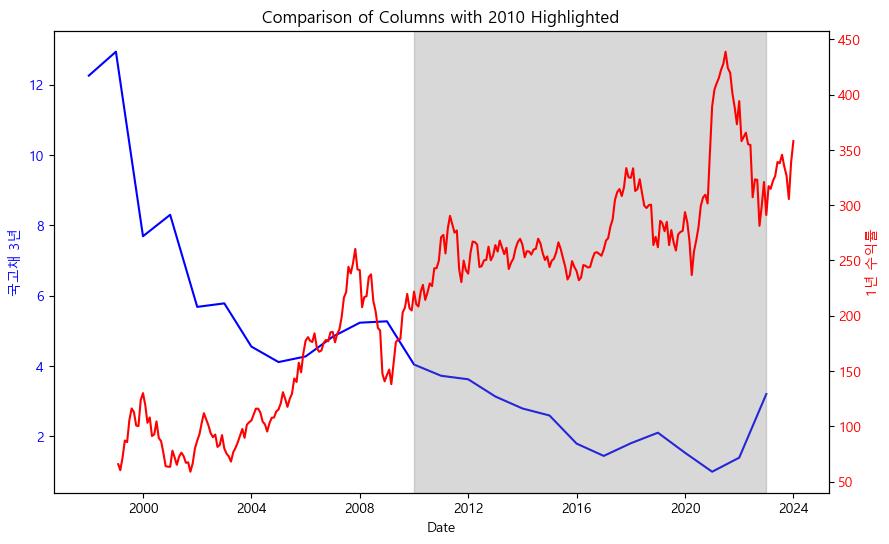

In [28]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# df1의 열을 첫 번째 축에 그래프로
ax1.plot(interest.index, interest['국고채 3년'], label='국고채 3년', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('국고채 3년', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 두 번째 축 생성
ax2 = ax1.twinx()

# df2의 열을 두 번째 축에 그래프로
ax2.plot(kospi.index, kospi['Adj Close'], label='1년 수익률', color='r')
ax2.set_ylabel('1년 수익률', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 2010년 영역 표시
start_date = '2009-12-31'
end_date = '2022-12-31'

# ax1.axvspan(start_date, end_date, color='gray', alpha=0.3)  # 첫 번째 축에 영역 표시
ax2.axvspan(start_date, end_date, color='gray', alpha=0.3)  # 두 번째 축에도 동일한 영역 표시

plt.title('Comparison of Columns with 2010 Highlighted')
plt.show()


+ 2010년 이후 코스피200을 비교 (2000년도부터 시작하면 구성 종목에서 어려움이 있음)